# Assignment 1: Greedy heuristics

## Description of a problem:

The problem is about selecting exactly 50% of the nodes to form a Hamiltonian cycle that minimizes the total distance of the path and the total cost of the selected nodes.

## Pseudocode of all implemented algorithms

- Random solution:
    ```
    for number_of_cities:
        cityIndexes += index
    shuffle_city_indexes
    for sollution_length:
        cityOrder += index
    sollution = cityOrder
    return sollution
    ```

- Nearest neighbor considering adding the node only at the end of the current path:
    ```
    for sollution_length:
        for number_of_cities:
            find_nearest_city_from_last
        sollution += nearest_city
    return sollution
    ```

- Nearest neighbor considering adding the node at all possible position:
    ```
    for sollution_length:
        for sollution_size:
            for number_of_cities:
                find_nearest_city
        sollution += nearest_city
    return sollution
    ```

- Greedy cycle:
    ```
    for sollution_length:
        for sollution_size:
            for number_of_cities:
                find_minimal_cycle_cost
        sollution += nearest_city
    return sollution
    ```

## Results of a computational experiments

In [19]:
import json
import os

def load_json_files_from_folder(folder_path):
    json_data = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                try:
                    data = json.load(file)
                    json_data.append(data)
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON from {filename}: {e}")
    
    return json_data

def find_solver_type_and_instance(type, data, instance):
    return [entry for entry in data if entry.get('solverType') == type if entry.get('instance') == instance]

def find_min(data):
    return min((entry for entry in data if 'objective function' in entry), key=lambda x: x['objective function'])

def find_max(data):
    return max((entry for entry in data if 'objective function' in entry), key=lambda x: x['objective function'])

def average_cost(data):
    objective_values = [entry['objective function'] for entry in data if 'objective function' in entry]
    
    return sum(objective_values) / len(objective_values) if objective_values else 0

solver_types = ['random', 'nn', 'nnAnywhere', 'greedyCycle']
instances = ['A', 'B']

def process_solver_data(solver_type, all_json_data, instance):
    data = find_solver_type_and_instance(solver_type, all_json_data, instance)
    print(f"Minimum from instance {instance} ({solver_type})", find_min(data).get('objective function'))
    print(f"Maximum from instance {instance} ({solver_type})", find_max(data).get('objective function'))
    print(f"Average from instance {instance} ({solver_type})", average_cost(data))
    return find_min(data)

folder_path = '../out'
all_json_data = load_json_files_from_folder(folder_path)

best_solutions = {}
for solver in solver_types:
    for instance in instances:
        best_solutions[f'{solver}_{instance}'] = process_solver_data(solver, all_json_data, instance)


Minimum from instance A (random) 211090.0
Maximum from instance A (random) 332399.0
Average from instance A (random) 262117.875
Minimum from instance B (random) 162544.0
Maximum from instance B (random) 291803.0
Average from instance B (random) 212699.725
Minimum from instance A (nn) 176317.0
Maximum from instance A (nn) 285970.0
Average from instance A (nn) 203404.765
Minimum from instance B (nn) 140673.0
Maximum from instance B (nn) 271113.0
Average from instance B (nn) 188742.7
Minimum from instance A (nnAnywhere) 168648.0
Maximum from instance A (nnAnywhere) 283418.0
Average from instance A (nnAnywhere) 213377.74
Minimum from instance B (nnAnywhere) 141524.0
Maximum from instance B (nnAnywhere) 269252.0
Average from instance B (nnAnywhere) 187310.815
Minimum from instance A (greedyCycle) 166546.0
Maximum from instance A (greedyCycle) 282645.0
Average from instance A (greedyCycle) 212370.12
Minimum from instance B (greedyCycle) 130700.0
Maximum from instance B (greedyCycle) 240642.0

## Best solutions:

In [20]:
for solver in solver_types:
    for instance in instances:
        best_solution = best_solutions[f'{solver}_{instance}']
        print(f"Best solution from instance {instance} ({solver})", best_solution.get('cityOrder'))

Best solution from instance A (random) [147, 159, 60, 64, 144, 47, 52, 66, 3, 114, 101, 99, 78, 0, 128, 138, 57, 25, 158, 54, 103, 97, 19, 160, 157, 35, 71, 11, 27, 55, 79, 88, 62, 28, 68, 65, 140, 139, 50, 70, 91, 51, 196, 34, 100, 119, 58, 8, 148, 93, 162, 48, 95, 111, 123, 189, 32, 195, 106, 142, 170, 143, 75, 185, 20, 72, 94, 69, 182, 194, 166, 89, 80, 6, 129, 14, 177, 115, 155, 92, 23, 84, 191, 33, 74, 63, 5, 171, 45, 137, 86, 37, 1, 121, 40, 133, 98, 2, 168, 12]
Best solution from instance B (random) [188, 80, 2, 58, 109, 13, 73, 183, 144, 90, 84, 57, 104, 52, 108, 168, 131, 97, 47, 91, 122, 154, 69, 142, 15, 182, 152, 162, 106, 8, 139, 25, 46, 117, 32, 199, 65, 140, 14, 4, 114, 35, 141, 87, 29, 172, 156, 174, 71, 6, 63, 93, 163, 23, 77, 12, 50, 143, 197, 126, 180, 127, 171, 176, 28, 21, 166, 105, 81, 7, 51, 24, 175, 107, 54, 0, 186, 33, 190, 181, 36, 37, 34, 9, 82, 192, 138, 134, 85, 102, 164, 118, 135, 17, 123, 61, 189, 185, 173, 68]
Best solution from instance A (nn) [72, 59, 

## 2D visualizations:

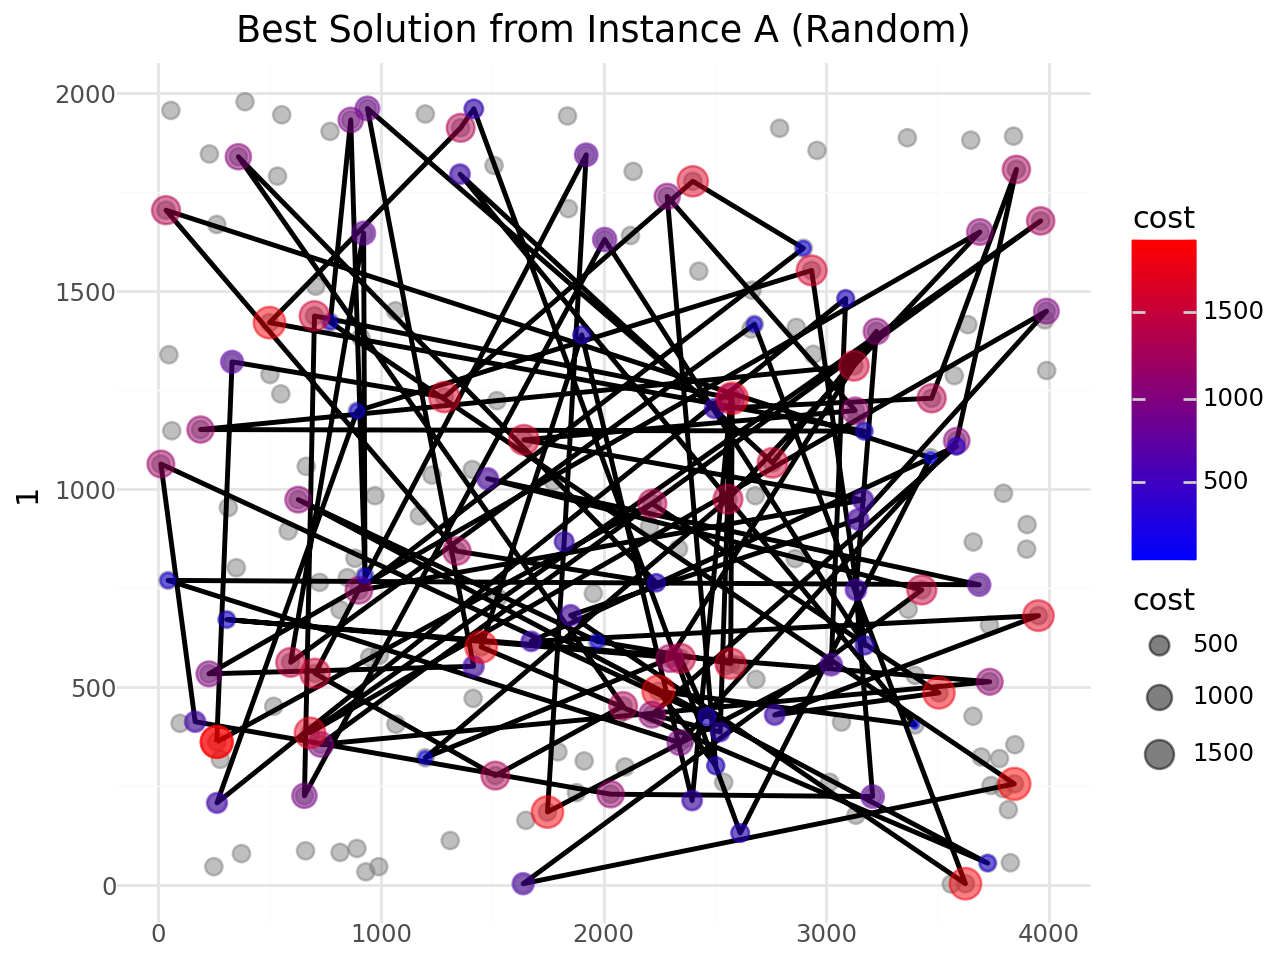

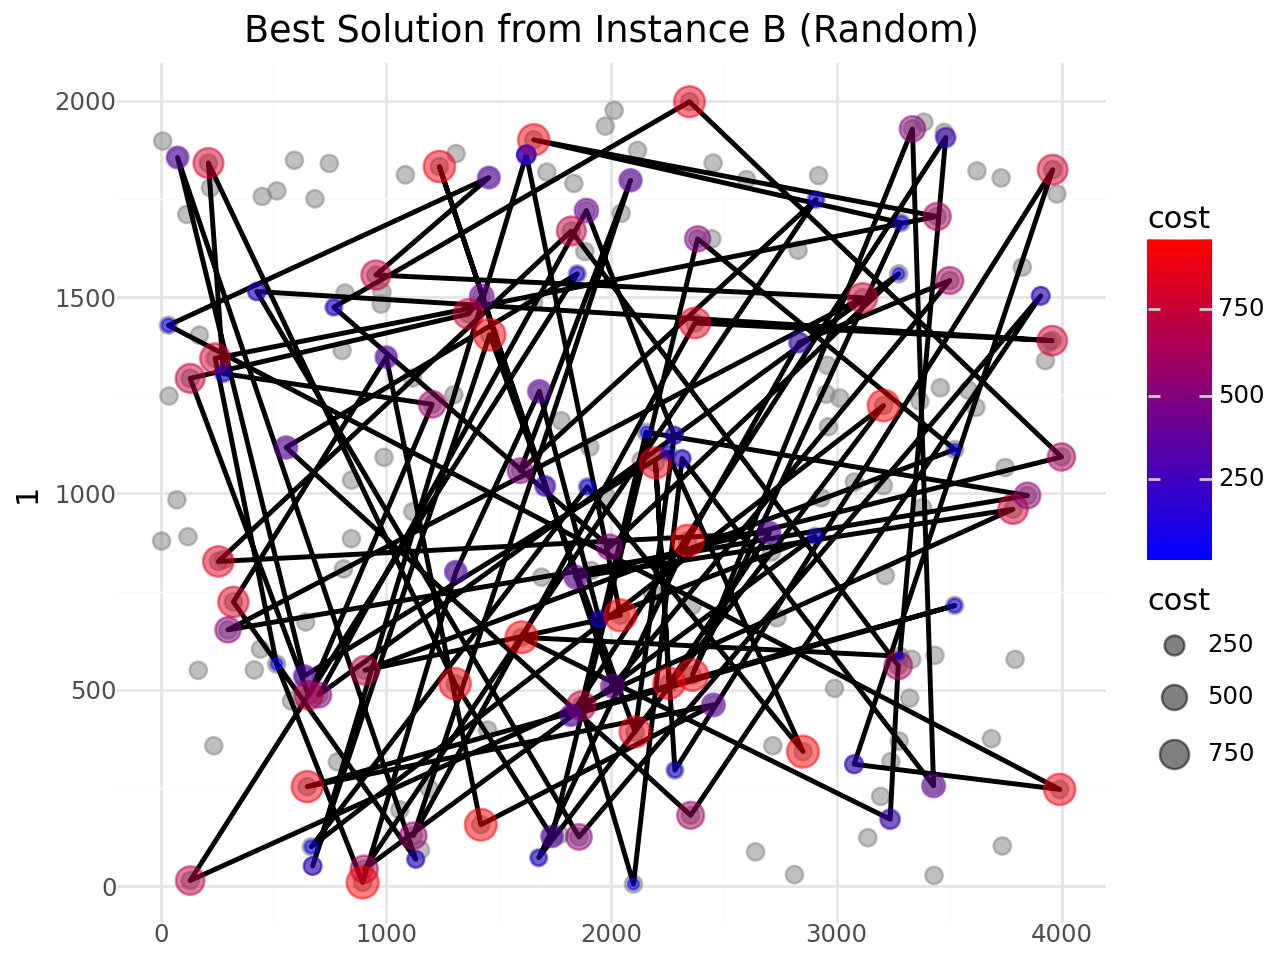

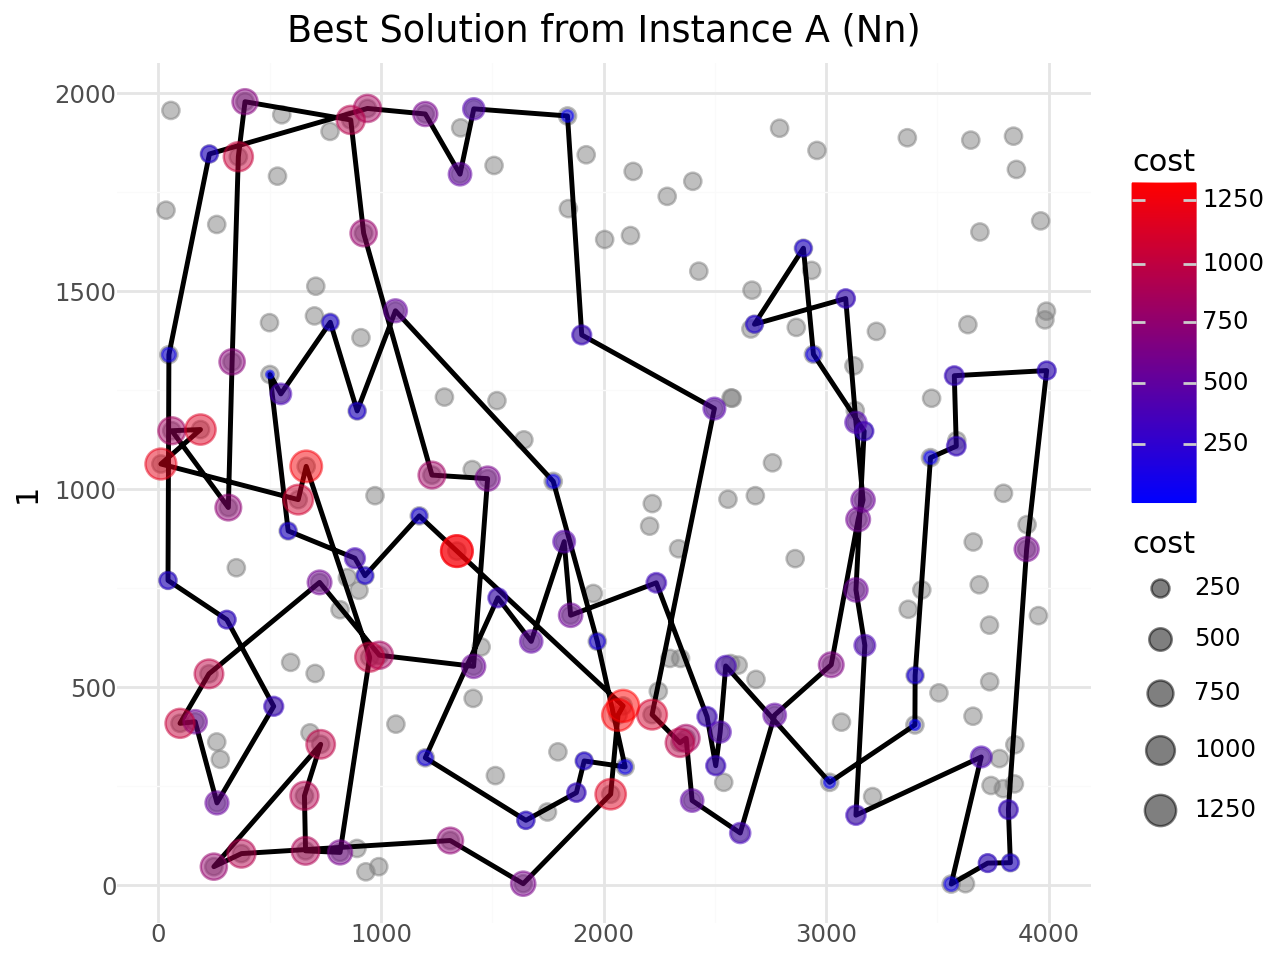

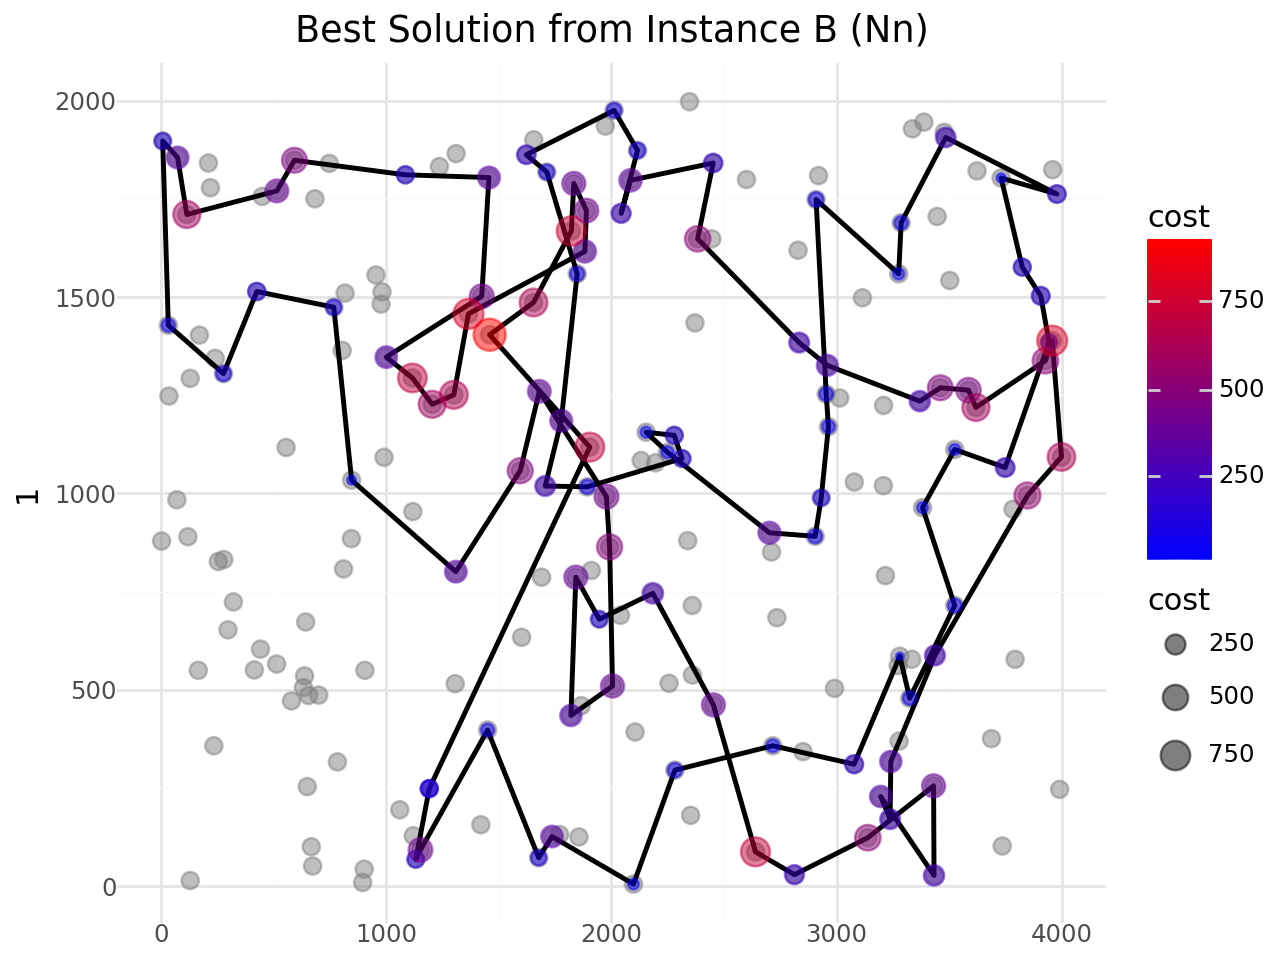

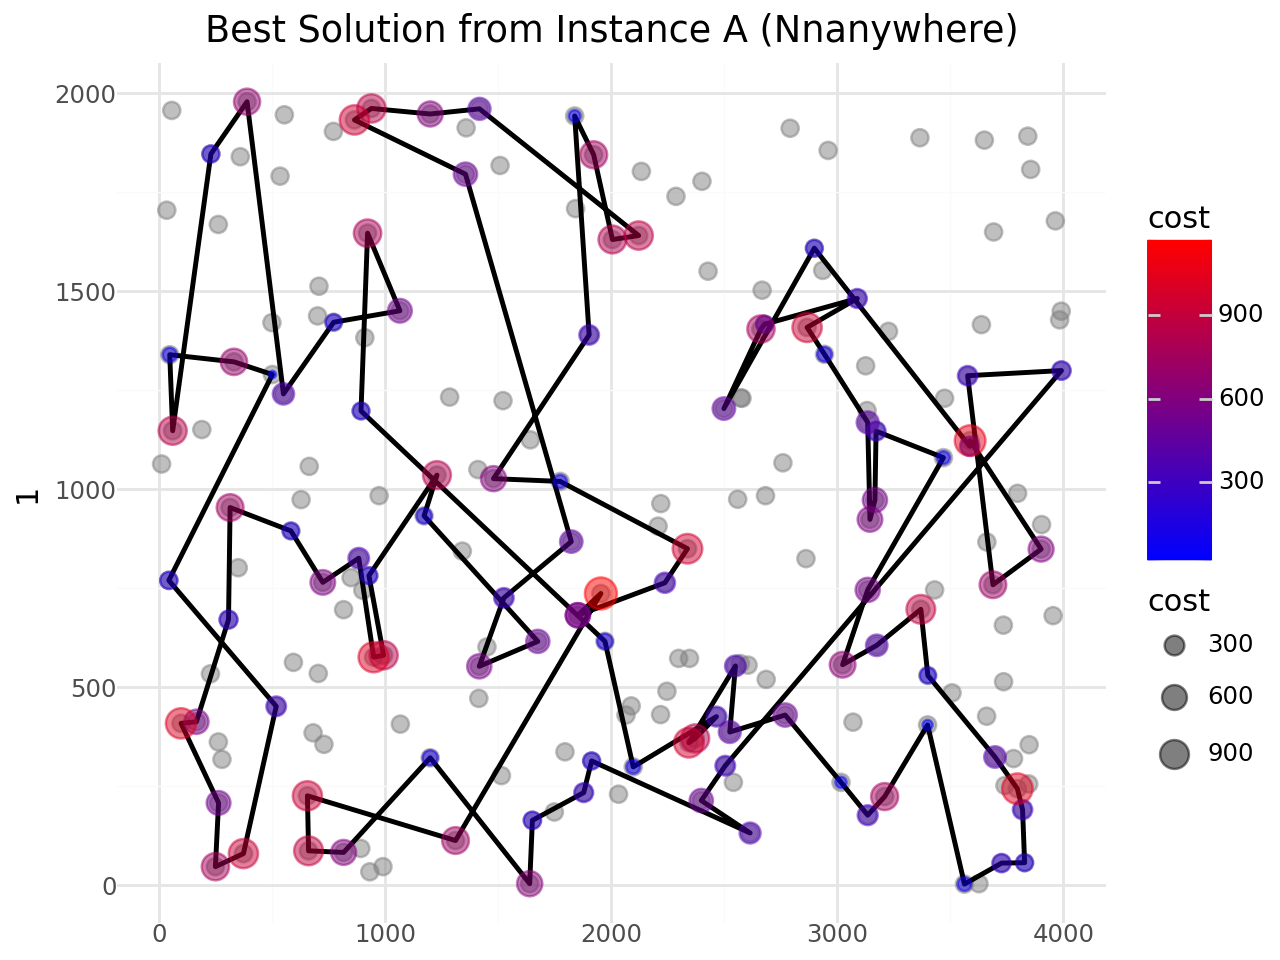

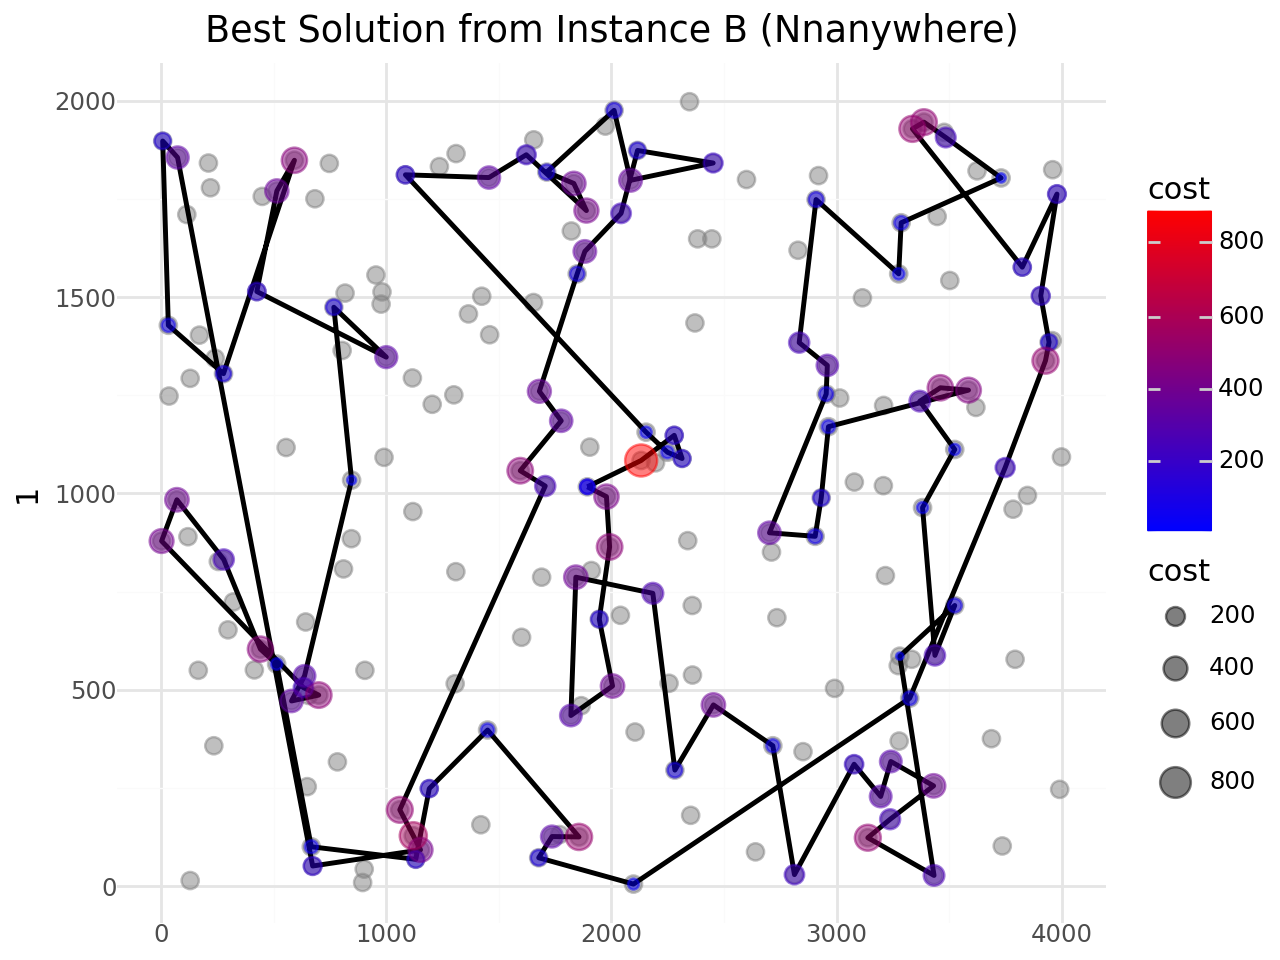

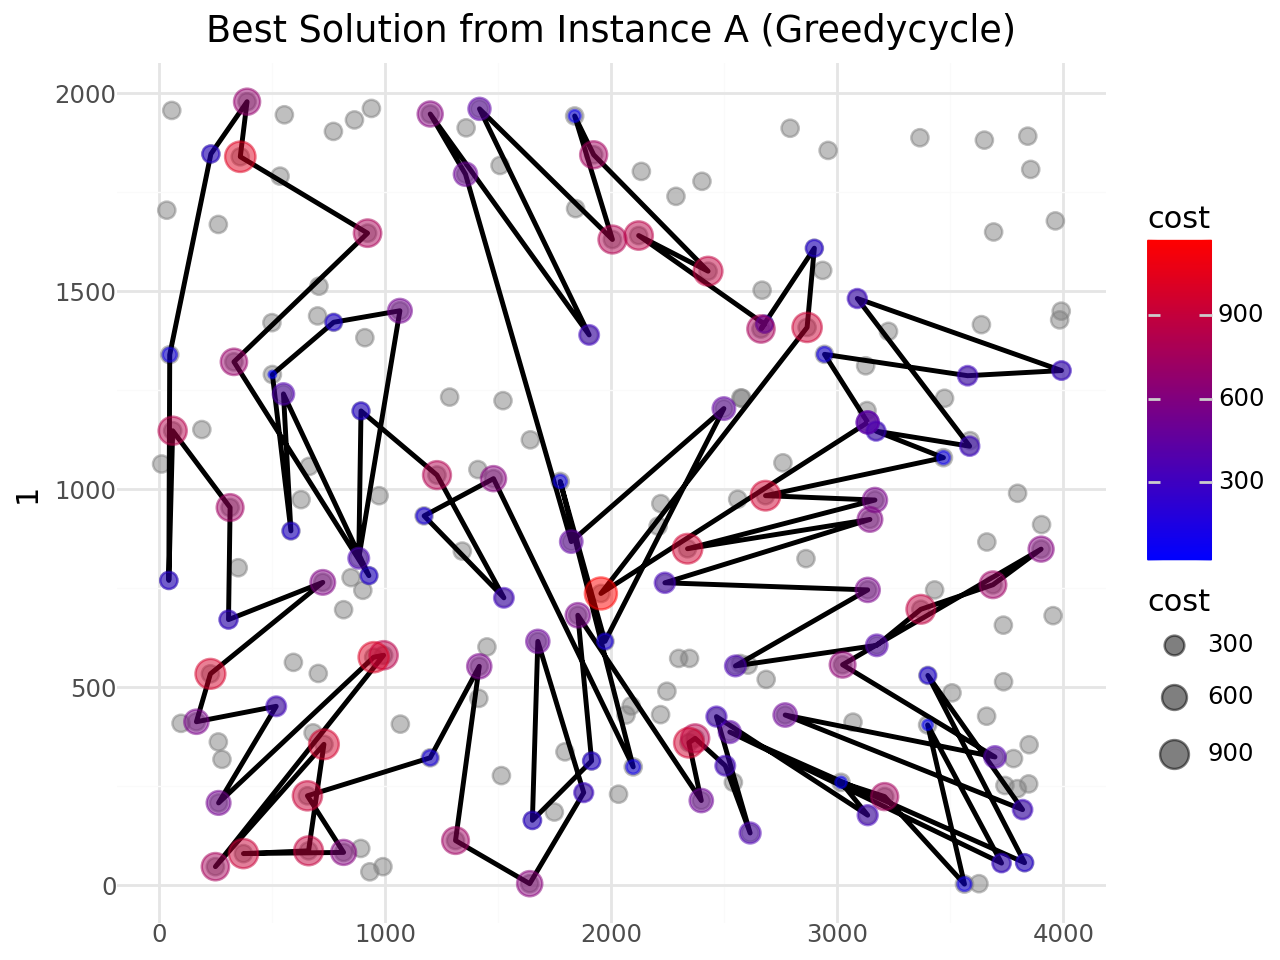

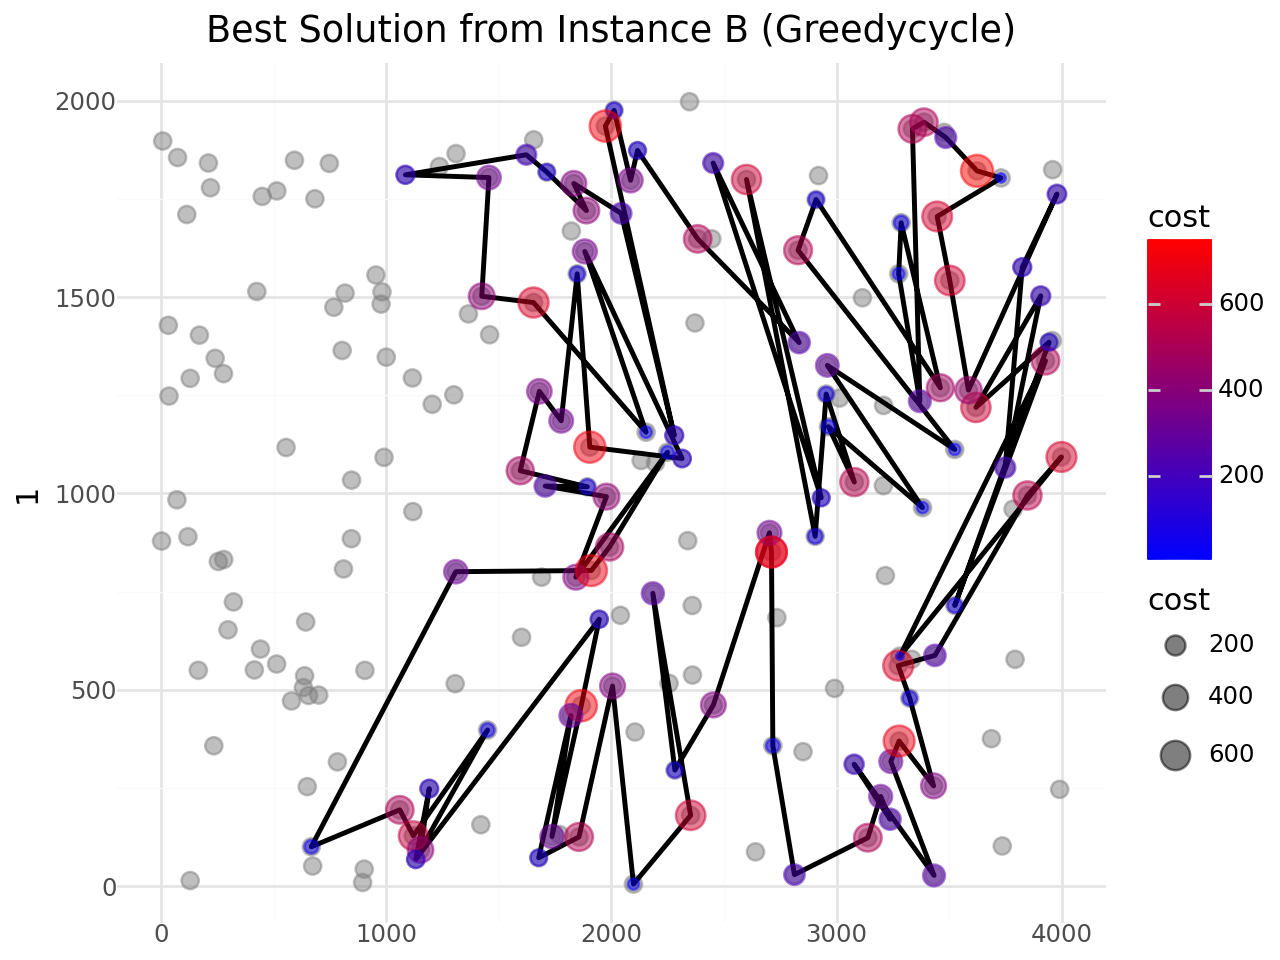

In [21]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, scale_color_gradient, labs, theme_minimal, geom_path

def load_coordinates_from_csv(csv_path):
    return pd.read_csv(csv_path, sep=';', header=None)

def prepare_data_for_plot(best_solution, coordinates_df):
    rows = []
    city_order = best_solution['cityOrder']
    
    for node_index in city_order:
        coord = coordinates_df.iloc[node_index]
        rows.append({
            'x': coord[0],
            'y': coord[1],
            'cost': coord[2],
        })
    rows.append(rows[0])
    return pd.DataFrame(rows)

def plot_solution(solution, coordinates_df, title):
    solution_df = prepare_data_for_plot(solution, coordinates_df)

    p = (ggplot() +
         geom_point(aes(x=coordinates_df[0], y=coordinates_df[1]), data=coordinates_df, color='grey', alpha=0.5, size=3) +
         geom_path(aes(x='x', y='y'), data=solution_df, color='black', size=1) +
         geom_point(aes(x='x', y='y', color='cost', size='cost'), data=solution_df, alpha=0.5) +
         scale_color_gradient(low='blue', high='red') +
         labs(title=title) +
         theme_minimal())
    
    return p

coordinates = {
    'A': load_coordinates_from_csv('../src/main/resources/instances/TSPA.csv'),
    'B': load_coordinates_from_csv('../src/main/resources/instances/TSPB.csv')
}

for solver in solver_types:
    for instance in instances:
        best_solution = best_solutions[f'{solver}_{instance}']
        title = f"Best Solution from Instance {instance} ({solver.capitalize()})"
        plot_solution(best_solution, coordinates[instance], title).show()

# Conclusions:

The sollutions were checked with a checker, and a link to the repository is: https://github.com/lucapl/Evolutionary-Computations.

Based on the performance of all solvers it's easy to say that random is the worst. On average it attained a score 50000 points below the rest. It's variance is also huge having over 1m difference in some results. Nearest neighbour taken from the end was far better, but still worse than the rest. It's best sollution was over 10000 points worse than the rest. It's better counterpart, nearest neighbour from any point, attained score of 168648.0 on instance A and 141524.0 on instance B. It is worth mentioning that it might not always be strictly better than nearest neighbour, due to greedy nature of both the algorithms. Lastly the greedy cycle performed the best of all 4, but not by much. The lowest of all it's scores was 130700.0 attained on instance B. It is worth mentioning that all algorithms were really fast, as they had only n^2 complexity.